<a href="https://colab.research.google.com/github/ajeuphoria/MSc-Dissertation-Project/blob/main/MSc_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/ajeuphoria/MSc-Dissertation-Project/main/raw-data-kaggle.csv'
df = pd.read_csv(url)

In [ ]:
#Reading the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    42116 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  23732 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
#Using Data Imputation and filling in HR data and grouping by runners

grouped_data = df.groupby("athlete")
imputed_data = grouped_data["average heart rate (bpm)"].transform("mean")
df["average heart rate (bpm)"] = df["average heart rate (bpm)"].fillna(imputed_data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    42116 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  40530 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
# Identifying rows which are missing Heart rate

missing_rows = df[df.isna().any(axis=1)]
print(missing_rows)

        athlete gender         timestamp  distance (m)  elapsed time (s)  \
2413   20181492      F  05/01/2020 09:07       10008.0              3486   
2414   20181492      F  04/01/2020 08:07       15162.9              4761   
2415   20181492      F  02/01/2020 10:50       11583.4              3710   
2416   20181492      F  31/12/2019 10:52       12008.9              3790   
2417   20181492      F  30/12/2019 07:49        5397.8              1718   
...         ...    ...               ...           ...               ...   
40265  20181492      F  25/03/2017 16:30        4579.8              1949   
40266  20181492      F  21/03/2017 05:24        5305.4              1770   
40267  20181492      F  18/03/2017 12:30       15093.7              5888   
40268  20181492      F  17/03/2017 05:25        6981.5              2295   
40269  20181492      F  15/03/2017 04:58       10968.0              3548   

       elevation gain (m)  average heart rate (bpm)  
2413                 42.0        

In [ ]:
# Filling rows with missing heart rates by substituting with overall mean

overall_mean = df['average heart rate (bpm)'].mean()

# Identify runners without heart rate data

df['average heart rate (bpm)'].fillna(overall_mean, inplace=True)

print(overall_mean)

147.61074077807584


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    42116 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  42116 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
df.head()

,athlete,gender,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm)
0,18042525,M,15/12/2019 09:08,2965.8,812,17.4,150.3
1,18042525,M,10/12/2019 19:27,10020.8,3290,52.2,160.8
2,18042525,M,03/12/2019 19:46,12132.2,4027,249.0,148.9
3,18042525,M,26/11/2019 19:46,11631.5,4442,194.0,136.2
4,18042525,M,19/11/2019 19:45,11708.1,4022,250.7,146.0


In [ ]:
# Drop duplicates based on 'runner_id' and 'timestamp' columns

df = df.drop_duplicates(subset=['athlete', 'timestamp'])

UniVariate and BiVariate Analysis

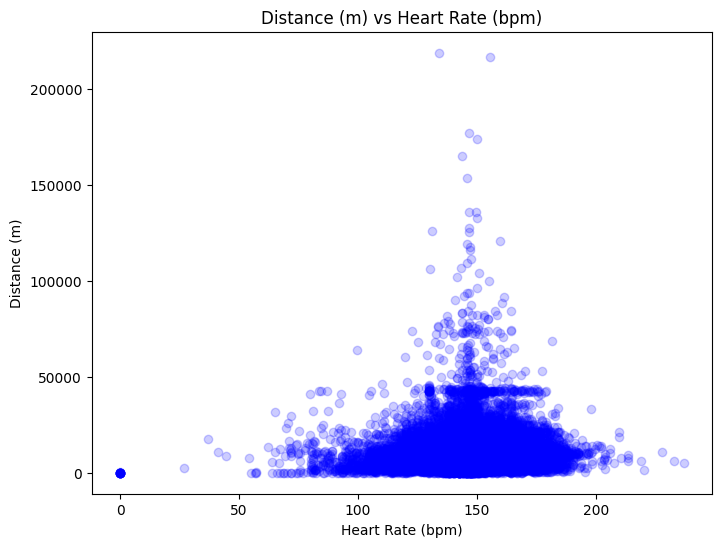

In [ ]:
# Creating a scatter plot

plt.figure(figsize=(8, 6))
plt.scatter(df['average heart rate (bpm)'], df['distance (m)'], color = 'blue', alpha = 0.2)
plt.title('Distance (m) vs Heart Rate (bpm)')

plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Distance (m)')
plt.show()

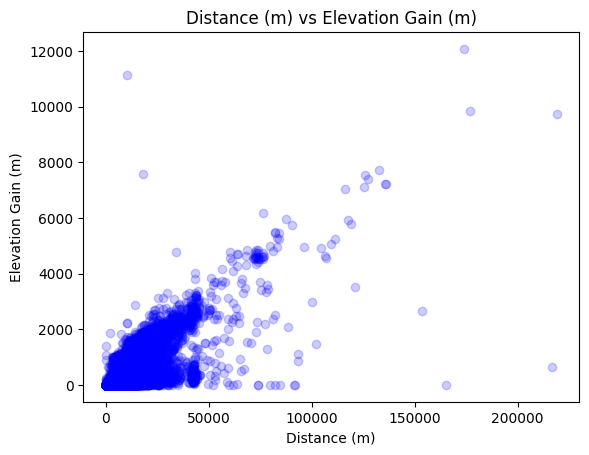

In [ ]:
# Scatter plot for distance vs Elevation gain

plt.scatter(df['distance (m)'], df['elevation gain (m)'], color='blue', alpha=0.2)
plt.title('Distance (m) vs Elevation Gain (m)')
plt.xlabel('Distance (m)')
plt.ylabel('Elevation Gain (m)')
plt.show()

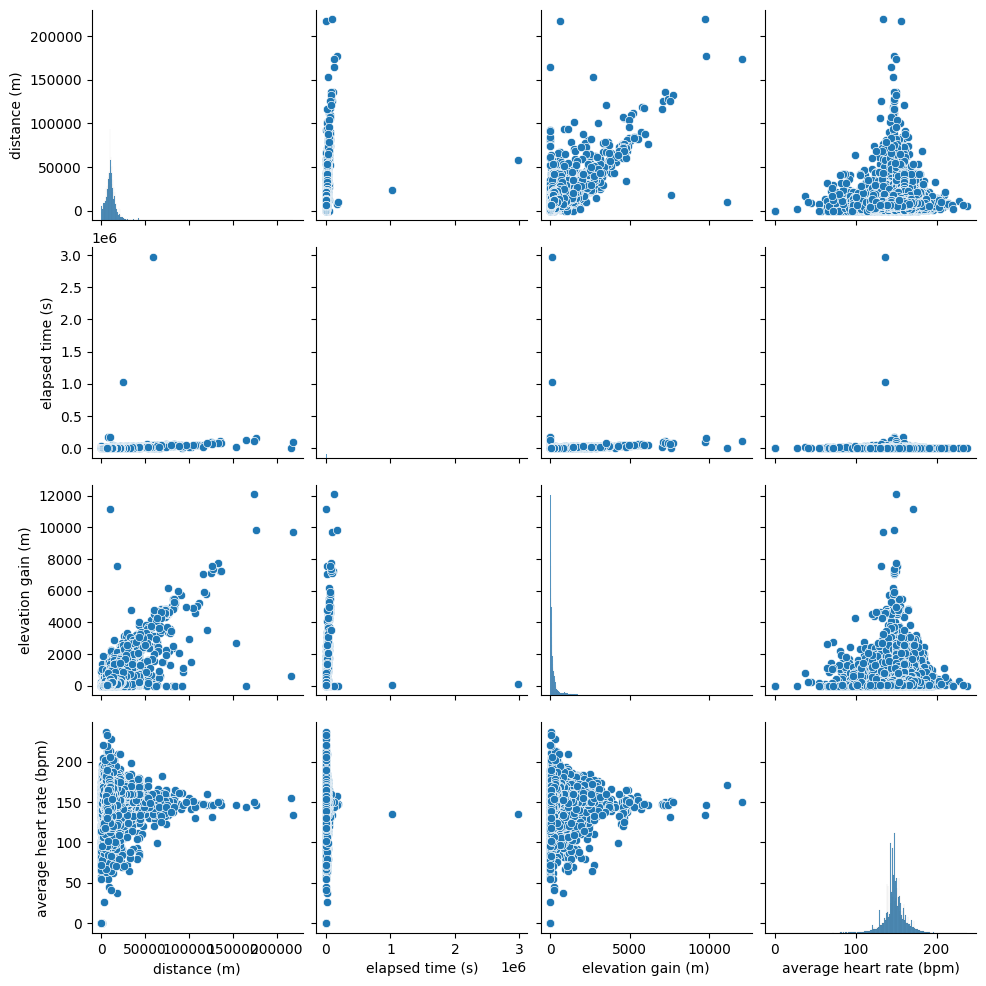

In [ ]:
# Drop 'athlete' column before creating pairplot
df_without_id = df.drop(columns = ['athlete'])


# Creating a pairplot without 'athlete ID'
sns.pairplot(df_without_id)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41644 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   41644 non-null  int64  
 1   gender                    41644 non-null  object 
 2   timestamp                 41644 non-null  object 
 3   distance (m)              41644 non-null  float64
 4   elapsed time (s)          41644 non-null  int64  
 5   elevation gain (m)        41644 non-null  float64
 6   average heart rate (bpm)  41644 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.5+ MB


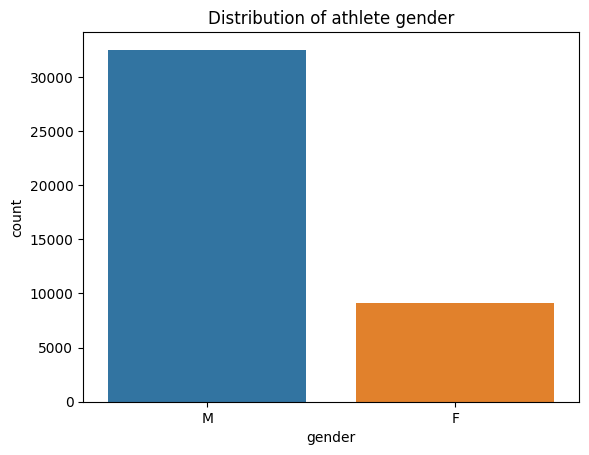

In [ ]:
# Distribution of athlete gender

sns.countplot(data = df, x = 'gender')
plt.title('Distribution of athlete gender')
plt.show()

<Axes: >

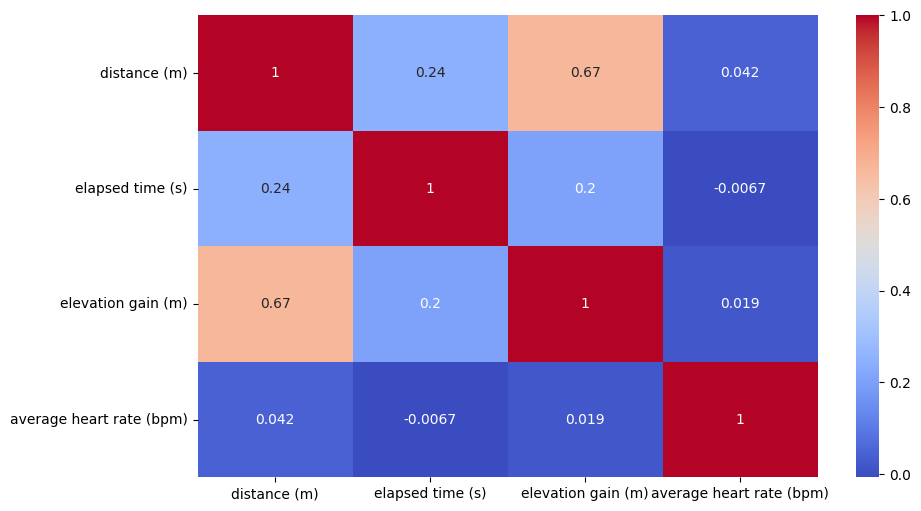

In [ ]:
# Corelation Heatmap

for_corr= df.drop(columns = 'athlete')
plt.figure(figsize=(10,6))
corr_matrix = for_corr.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

In [ ]:
corr_matrix["elapsed time (s)"].sort_values(ascending = False)

elapsed time (s)            1.000000
distance (m)                0.243735
elevation gain (m)          0.202988
average heart rate (bpm)   -0.006719
Name: elapsed time (s), dtype: float64

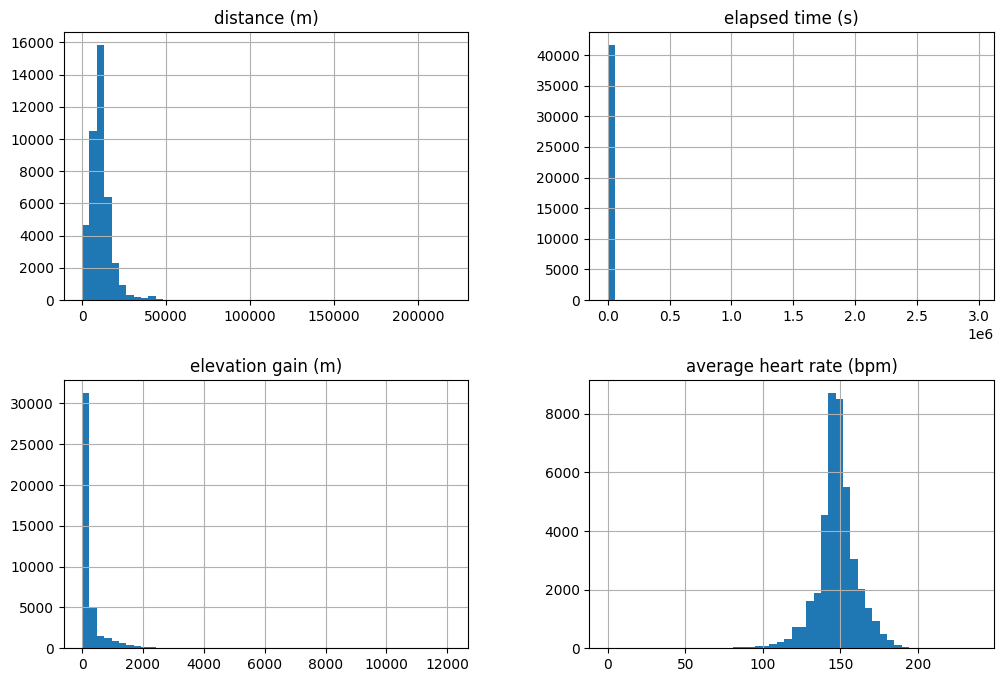

In [ ]:
for_hist = df.drop(columns = 'athlete')
for_hist.hist(bins = 50, figsize = (12,8))  # bins = 50 is grouping the total dataset into 50 groups)
plt.show()

## Grouping Athletes to understand their frequency of runs in a week and categorising them as Advanced, Intermediate and Beginner

In [ ]:

# Convert the 'timestamp' column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the week number from the 'timestamp' column
df['week_number'] = df['timestamp'].dt.week

# Categorize runners into 'Advanced', 'Intermediate', and 'Beginner' based on their weekly runs
def categorize_runs(runs_per_week):
    if runs_per_week >= 5:
        return "Advanced"
    elif 3 <= runs_per_week <= 4:
        return "Intermediate"
    else:
        return "Beginner"

runner_weekly_counts = df.groupby(['athlete', 'week_number']).size().reset_index(name='runs_per_week')  #Group by Athlete and Week number


runner_weekly_counts['run_category'] = runner_weekly_counts['runs_per_week'].apply(categorize_runs) # Creating new column run category and applying the categorize_runs functions for each row.

# Count the number of runners in each category
runner_category_counts = runner_weekly_counts.groupby('run_category')['athlete'].nunique().reset_index()  # Grouping by category and taking unique athlete id.

# Display the results
print(runner_category_counts)


   run_category  athlete
0      Advanced      107
1      Beginner       89
2  Intermediate       99


In [ ]:
count_athletes = df['athlete'].nunique()
print(count_athletes)

116


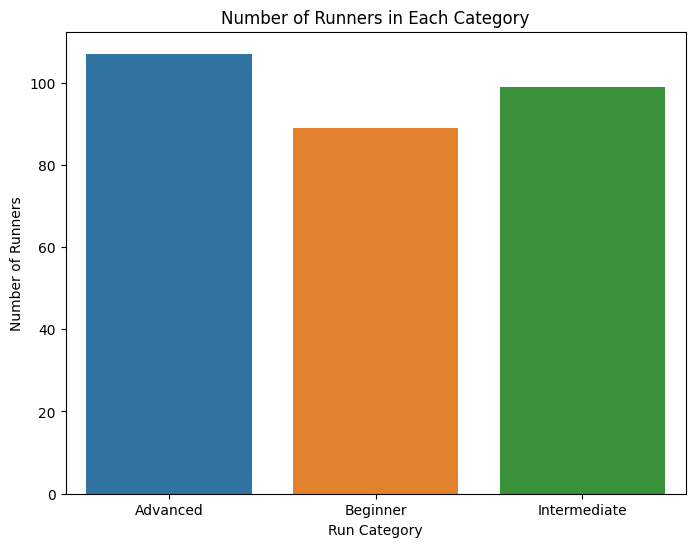

In [ ]:
# Create a bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x='run_category', y='athlete', data=runner_category_counts)

# Add labels and title
plt.xlabel('Run Category')
plt.ylabel('Number of Runners')
plt.title('Number of Runners in Each Category')

plt.show()

In [ ]:
runner_weekly_counts.info()
runner_weekly_counts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   athlete        5565 non-null   int64 
 1   week_number    5565 non-null   int64 
 2   runs_per_week  5565 non-null   int64 
 3   run_category   5565 non-null   object
dtypes: int64(3), object(1)
memory usage: 174.0+ KB


,athlete,week_number,runs_per_week,run_category
0,771514,1,1,Beginner
1,771514,2,1,Beginner
2,771514,4,1,Beginner
3,771514,6,1,Beginner
4,771514,7,2,Beginner


In [ ]:
df.head()

,athlete,gender,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number
0,18042525,M,2019-12-15 09:08:00,2965.8,812,17.4,150.3,50
1,18042525,M,2019-10-12 19:27:00,10020.8,3290,52.2,160.8,41
2,18042525,M,2019-03-12 19:46:00,12132.2,4027,249.0,148.9,11
3,18042525,M,2019-11-26 19:46:00,11631.5,4442,194.0,136.2,48
4,18042525,M,2019-11-19 19:45:00,11708.1,4022,250.7,146.0,47


Applying One-Hot Encoding Technique for the Gender Column

In [ ]:
df_encoded = pd.get_dummies(df, columns = ['gender'])

In [ ]:
df_encoded.head()

,athlete,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M
0,18042525,2019-12-15 09:08:00,2965.8,812,17.4,150.3,50,0,1
1,18042525,2019-10-12 19:27:00,10020.8,3290,52.2,160.8,41,0,1
2,18042525,2019-03-12 19:46:00,12132.2,4027,249.0,148.9,11,0,1
3,18042525,2019-11-26 19:46:00,11631.5,4442,194.0,136.2,48,0,1
4,18042525,2019-11-19 19:45:00,11708.1,4022,250.7,146.0,47,0,1


In [ ]:
encoded_data = df_encoded.copy()   #Keeping a copy of the label encoded data

In [ ]:
encoded_data['Year'] = df_encoded['timestamp'].dt.year
encoded_data['Month'] = df_encoded['timestamp'].dt.month
encoded_data['Day'] = df_encoded['timestamp'].dt.day

In [ ]:
encoded_data.head()

,athlete,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M,Year,Month,Day
0,18042525,2019-12-15 09:08:00,2965.8,812,17.4,150.3,50,0,1,2019,12,15
1,18042525,2019-10-12 19:27:00,10020.8,3290,52.2,160.8,41,0,1,2019,10,12
2,18042525,2019-03-12 19:46:00,12132.2,4027,249.0,148.9,11,0,1,2019,3,12
3,18042525,2019-11-26 19:46:00,11631.5,4442,194.0,136.2,48,0,1,2019,11,26
4,18042525,2019-11-19 19:45:00,11708.1,4022,250.7,146.0,47,0,1,2019,11,19


In [ ]:
encoded_data.drop(['timestamp','athlete'], axis = 1, inplace = True)

In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41644 entries, 0 to 42115
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   distance (m)              41644 non-null  float64
 1   elapsed time (s)          41644 non-null  int64  
 2   elevation gain (m)        41644 non-null  float64
 3   average heart rate (bpm)  41644 non-null  float64
 4   week_number               41644 non-null  int64  
 5   gender_F                  41644 non-null  uint8  
 6   gender_M                  41644 non-null  uint8  
 7   Year                      41644 non-null  int64  
 8   Month                     41644 non-null  int64  
 9   Day                       41644 non-null  int64  
dtypes: float64(3), int64(5), uint8(2)
memory usage: 2.9 MB


# Applying Standardisation


In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

y = encoded_data['elapsed time (s)']   # Target Variable

# Resetting the index of encoded_data

encoded_data.reset_index(drop=True, inplace=True)

# Columns to be scaled:

col_std = ['distance (m)', 'elevation gain (m)','average heart rate (bpm)', 'week_number','Year','Month', 'Day']

feature_scaler = StandardScaler()

# Scale only the selected feature columns

X_scaled = feature_scaler.fit_transform(encoded_data[col_std])

# Convert the scaled features back to a DataFrame
df_scaled_features = pd.DataFrame(X_scaled, columns=col_std, index=encoded_data.index)

# Scale target columns
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1))

# Combine the scaled features with the non-scaled columns (excluding the original target column)
stand_data = pd.concat([df_scaled_features, encoded_data.drop(columns=col_std + ['elapsed time (s)'])], axis=1)

# Print the final DataFrame
stand_data.head()

,distance (m),elevation gain (m),average heart rate (bpm),week_number,Year,Month,Day,gender_F,gender_M
0,-1.076918,-0.498105,0.192574,1.539752,1.001921,1.566751,-0.070114,0,1
1,-0.134666,-0.421243,0.951266,0.942148,1.001921,0.986278,-0.412481,0,1
2,0.147328,0.013423,0.091416,-1.049865,1.001921,-1.045379,-0.412481,0,1
3,0.080456,-0.108054,-0.826240,1.406952,1.001921,1.276514,1.185233,0,1
4,0.090686,0.017178,-0.118128,1.340551,1.001921,1.276514,0.386376,0,1


In [ ]:
# Get the shape of the scaler
scaler_shape = feature_scaler.scale_.shape

# Print the shape
print("Scaler Shape:", scaler_shape)

Scaler Shape: (7,)


In [ ]:
# Target Scaler

joblib.dump(target_scaler, 'target_scaler.joblib')

['target_scaler.joblib']

In [ ]:
# Feature Scaler
joblib.dump(feature_scaler, 'feature_scaler.joblib')

['feature_scaler.joblib']

#Splitting the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
from math import sqrt

# Define X (features) and y (target)
X = stand_data  # Scaled features
y = y_scaled    # Scaled target variable

# Split the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('X_train shape is: ', X_train.shape)
print('y_train shape is: ', y_train.shape)
print('X_test shape is: ', X_test.shape)
print('y_test shape is: ', y_test.shape)

X_train shape is:  (33315, 9)
y_train shape is:  (33315, 1)
X_test shape is:  (8329, 9)
y_test shape is:  (8329, 1)


Applying Decision Tree Regression Algorithm



In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
DT_train = dt.score(X_train, y_train)
print(DT_train)

0.9999997265647994


In [ ]:
DT_test = dt.score(X_test, y_test)
print(DT_test)

0.725248950793951


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

DT_MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : {}'.format(round(DT_MAE, 2)))
DT_MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : {}'.format(round(DT_MSE, 2)))
DT_RMSE = sqrt(DT_MSE)
print('Root Mean Square Error : {}'.format(round(DT_RMSE, 2)))
DT_R2_SCORE=r2_score(y_test, y_pred)
print('R2_SCORE (Coefficient Of Determination) : {}'.format(round(DT_R2_SCORE, 2)))

Mean Absolute Error : 0.04
Mean Squared Error : 0.02
Root Mean Square Error : 0.13
R2_SCORE (Coefficient Of Determination) : 0.73


Applying Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
LR_MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : {}'.format(round(LR_MAE, 2)))

LR_MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : {}'.format(round(LR_MSE, 2)))

LR_RMSE = sqrt(LR_MSE)
print('Root Mean Square Error  : %f' % LR_RMSE)

LR_R2_SCORE=r2_score(y_test, y_pred)
print('R2_SCORE (Coefficient Of Determination)  : %f' % LR_R2_SCORE)

Mean Absolute Error : 0.06
Mean Squared Error : 0.01
Root Mean Square Error  : 0.097500
R2_SCORE (Coefficient Of Determination)  : 0.841790


Applying Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')  # Using Radial Basis Function (RBF) kernel
svr.fit(X_train, y_train)

SVR()

In [ ]:
# Making predictions
y_pred = svr.predict(X_test)

In [ ]:
SVR_MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : {}'.format(round(SVR_MAE, 2)))

SVR_MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : {}'.format(round(SVR_MSE, 2)))

SVR_RMSE = sqrt(SVR_MSE)
print('Root Mean Square Error  : %f' % SVR_RMSE)

SVR_R2_SCORE=r2_score(y_test, y_pred)
print('R2_SCORE (Coefficient Of Determination)  : %f' % SVR_R2_SCORE)

Mean Absolute Error : 0.05
Mean Squared Error : 0.01
Root Mean Square Error  : 0.109297
R2_SCORE (Coefficient Of Determination)  : 0.801190


Applying Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network structure
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer with 10 nodes
model.add(Dense(1, activation='linear'))  # Output layer for regression


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.2285
Epoch 2/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.1782
Epoch 3/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.1719
Epoch 4/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.1713
Epoch 5/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.1694
Epoch 6/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.1673
Epoch 7/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.1677
Epoch 8/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.1679
Epoch 9/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.1669
Epoch 10/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.1659
Epoch 11/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.1642
Epoch 12/100
1042/1042 [==============================] - 2s 2ms/step - lo

In [ ]:
# Evaluate the model
nn_mse = mean_squared_error(y_test, y_pred)
nn_mae = mean_absolute_error(y_test, y_pred)
nn_rmse = np.sqrt(nn_mse)
nn_r2 = r2_score(y_test, y_pred)

# Display the results
print('Mean Squared Error : {}'.format(round(nn_mse, 2)))
print('Root Mean Squared Error : {}'.format(round(nn_rmse, 2)))
print('Mean Absolute Error : {}'.format(round(nn_mae, 2)))
print('R2_score : {}'.format(round(nn_r2, 2)))

Mean Squared Error : 0.01
Root Mean Squared Error : 0.11
Mean Absolute Error : 0.05
R2_score : 0.8


In [ ]:
model.save('nn_reg_model.h5')

In [ ]:
# Target Scaler

joblib.dump(target_scaler, 'target_scaler.joblib')

['target_scaler.joblib']

Plot a graph for the RMSE scores for the different models


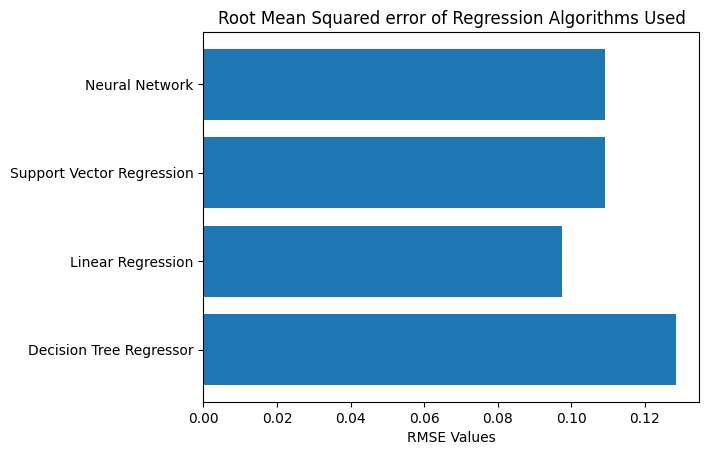

In [ ]:
algorithms = ['Decision Tree Regressor', 'Linear Regression', 'Support Vector Regression', 'Neural Network']
model_scores = [DT_RMSE, LR_RMSE, nn_rmse, SVR_RMSE ]

plt.barh(algorithms, model_scores)
plt.title('Root Mean Squared error of Regression Algorithms Used')
plt.xlabel('RMSE Values')
plt.show()

|Regression Algorithms          |   RMSE   |   MAE   | R2_Score  |  MSE   |
|-------------------------------|----------|---------|-----------|--------|
| Decision Tree Regressor       |  0.13    |   0.04  |   0.72    |  0.02  |
| Linear Regression             |  0.09    |   0.06  |   0.84    |  0.01  |       
| Support Vector Regressor      |  0.11    |   0.05  |   0.84    |  0.01  |   
| Neural Networks               | 0.11     |   0.05  |   0.8     |  0.01  |


# Fatigue Detection

 Features: 'athlete', 'gender', 'timestamp', 'distance (m)', 'elapsed time (s)', 'elevation gain (m)', 'average heart rate (bpm)', 'week_number', 'gender_F', 'gender_M'

Target: 'distance (m)' (binary labels indicating fatigue)

In [ ]:
df_encoded.head()

,athlete,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M
0,18042525,2019-12-15 09:08:00,2965.8,812,17.4,150.3,50,0,1
1,18042525,2019-10-12 19:27:00,10020.8,3290,52.2,160.8,41,0,1
2,18042525,2019-03-12 19:46:00,12132.2,4027,249.0,148.9,11,0,1
3,18042525,2019-11-26 19:46:00,11631.5,4442,194.0,136.2,48,0,1
4,18042525,2019-11-19 19:45:00,11708.1,4022,250.7,146.0,47,0,1


In [ ]:
df_encoded['Year'] = df_encoded['timestamp'].dt.year
df_encoded['Month'] = df_encoded['timestamp'].dt.month
df_encoded['Day'] = df_encoded['timestamp'].dt.day

In [ ]:
df_encoded.head()

,athlete,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M,Year,Month,Day
0,18042525,2019-12-15 09:08:00,2965.8,812,17.4,150.3,50,0,1,2019,12,15
1,18042525,2019-10-12 19:27:00,10020.8,3290,52.2,160.8,41,0,1,2019,10,12
2,18042525,2019-03-12 19:46:00,12132.2,4027,249.0,148.9,11,0,1,2019,3,12
3,18042525,2019-11-26 19:46:00,11631.5,4442,194.0,136.2,48,0,1,2019,11,26
4,18042525,2019-11-19 19:45:00,11708.1,4022,250.7,146.0,47,0,1,2019,11,19


In [ ]:
df_encoded.drop(['athlete','timestamp'], axis = 1, inplace = True)

In [ ]:
df_test = df_encoded.copy()

**Fatigue Score** =  Normalized Heart Rate + Normalized Elevation + Normalized Distance + Normalized Elapsed Time



In [ ]:
df_encoded['Fatigue Score'] = df_encoded['distance (m)'] + \
                              df_encoded['elapsed time (s)'] + \
                              df_encoded['elevation gain (m)'] + \
                              df_encoded['average heart rate (bpm)']


In [ ]:
df_encoded.head()

,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M,Year,Month,Day,Fatigue Score
0,2965.8,812,17.4,150.3,50,0,1,2019,12,15,3945.5
1,10020.8,3290,52.2,160.8,41,0,1,2019,10,12,13523.8
2,12132.2,4027,249.0,148.9,11,0,1,2019,3,12,16557.1
3,11631.5,4442,194.0,136.2,48,0,1,2019,11,26,16403.7
4,11708.1,4022,250.7,146.0,47,0,1,2019,11,19,16126.8


In [ ]:
df_fatigue = df_encoded.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_fatigue), columns=df_fatigue.columns)

In [ ]:
df_normalized.head()

,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M,Year,Month,Day,Fatigue Score
0,0.013546,0.000273,0.001441,0.634177,0.942308,0.0,1.0,0.95,1.000000,0.466667,0.001302
1,0.045768,0.001107,0.004322,0.678481,0.769231,0.0,1.0,0.95,0.818182,0.366667,0.004463
2,0.055411,0.001355,0.020615,0.628270,0.192308,0.0,1.0,0.95,0.181818,0.366667,0.005464
3,0.053124,0.001495,0.016062,0.574684,0.903846,0.0,1.0,0.95,0.909091,0.833333,0.005413
4,0.053474,0.001354,0.020756,0.616034,0.884615,0.0,1.0,0.95,0.909091,0.600000,0.005322


In [ ]:
# Applying  weights for the features for their corelation to fatigue level

weight_heart_rate = 0.25
weight_elevation_gain = 0.30
weight_distance = 0.25
weight_elapsed_time = 0.20


In [ ]:
df_normalized['Fatigue Score'] = (weight_distance * df_normalized['distance (m)'] +
                               weight_elapsed_time * df_normalized['elapsed time (s)'] +
                               weight_elevation_gain * df_normalized['elevation gain (m)'] +
                               weight_heart_rate * df_normalized['average heart rate (bpm)'])

In [ ]:
df_normalized.head()

,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M,Year,Month,Day,Fatigue Score
0,0.013546,0.000273,0.001441,0.634177,0.942308,0.0,1.0,0.95,1.000000,0.466667,0.162418
1,0.045768,0.001107,0.004322,0.678481,0.769231,0.0,1.0,0.95,0.818182,0.366667,0.182580
2,0.055411,0.001355,0.020615,0.628270,0.192308,0.0,1.0,0.95,0.181818,0.366667,0.177376
3,0.053124,0.001495,0.016062,0.574684,0.903846,0.0,1.0,0.95,0.909091,0.833333,0.162069
4,0.053474,0.001354,0.020756,0.616034,0.884615,0.0,1.0,0.95,0.909091,0.600000,0.173874


In [ ]:
df_normalized['Fatigue Score'].describe()

count    41644.000000
mean         0.174646
std          0.023839
min          0.000000
25%          0.162803
50%          0.172154
75%          0.184047
max          0.664867
Name: Fatigue Score, dtype: float64

A caculation of Fatigue Level based on the data dristribution of Fatigue Score

In [ ]:
def categorize_fatigue(score):
    if score < 0.162803:  # Below 25th percentile
        return "Low Fatigue"
    elif 0.162803 <= score < 0.172154:  # 25th to 50th percentile
        return "Moderate Fatigue"
    elif 0.172154 <= score < 0.184047:  # 50th to 75th percentile
        return "High Fatigue"
    else:  # Above 75th percentile
        return "Very High Fatigue"

In [ ]:
df_normalized['Fatigue Level'] = df_normalized['Fatigue Score'].apply(lambda x:categorize_fatigue (x))

In [ ]:
df_normalized.drop(['Fatigue Score'], axis = 1, inplace = True)

In [ ]:
df_normalized.head()

,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M,Year,Month,Day,Fatigue Level
0,0.013546,0.000273,0.001441,0.634177,0.942308,0.0,1.0,0.95,1.000000,0.466667,Low Fatigue
1,0.045768,0.001107,0.004322,0.678481,0.769231,0.0,1.0,0.95,0.818182,0.366667,High Fatigue
2,0.055411,0.001355,0.020615,0.628270,0.192308,0.0,1.0,0.95,0.181818,0.366667,High Fatigue
3,0.053124,0.001495,0.016062,0.574684,0.903846,0.0,1.0,0.95,0.909091,0.833333,Low Fatigue
4,0.053474,0.001354,0.020756,0.616034,0.884615,0.0,1.0,0.95,0.909091,0.600000,High Fatigue


# **Applying Classification Algorithms to train the dataset for predicting fatigue**

**Train and Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
X1 = df_normalized.drop('Fatigue Level', axis = 1)
y1 = df_normalized['Fatigue Level']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state = 42)

**Applying Gaussian Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [ ]:
naive_bayes.fit(X1_train, y1_train)

GaussianNB()

In [ ]:
y1_pred = naive_bayes.predict(X1_test)

In [ ]:
accuracy_gnb = accuracy_score(y1_test, y1_pred)*100
print(f"Accuracy: {accuracy_gnb:.2f} %")

Accuracy: 61.15 %


In [ ]:
classification_rep = classification_report(y1_test, y1_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
                    precision    recall  f1-score   support

     High Fatigue       0.50      0.47      0.48      2145
      Low Fatigue       0.69      0.70      0.70      2105
 Moderate Fatigue       0.54      0.85      0.66      2058
Very High Fatigue       0.89      0.43      0.58      2021

         accuracy                           0.61      8329
        macro avg       0.66      0.61      0.61      8329
     weighted avg       0.65      0.61      0.60      8329



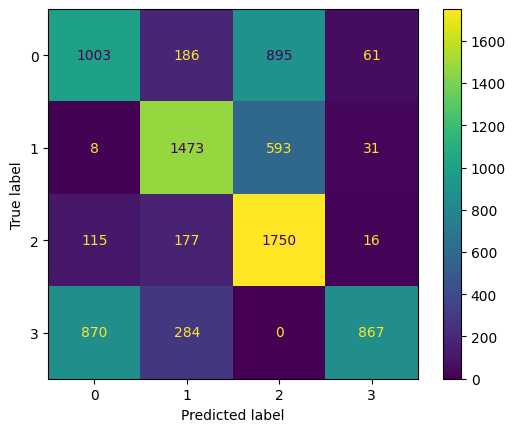

In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y1_test, y1_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

In [ ]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y1_test, y1_pred))

print("Confusion Matrix:")
print(confusion_matrix(y1_test, y1_pred))

Classification Report:
                   precision    recall  f1-score   support

     High Fatigue       0.50      0.47      0.48      2145
      Low Fatigue       0.69      0.70      0.70      2105
 Moderate Fatigue       0.54      0.85      0.66      2058
Very High Fatigue       0.89      0.43      0.58      2021

         accuracy                           0.61      8329
        macro avg       0.66      0.61      0.61      8329
     weighted avg       0.65      0.61      0.60      8329

Confusion Matrix:
[[1003  186  895   61]
 [   8 1473  593   31]
 [ 115  177 1750   16]
 [ 870  284    0  867]]


**Decision Tree Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [ ]:
y1_pred = clf.predict(X1_test)

In [ ]:
# Evaluate the model

accuracy_dt = accuracy_score(y1_test, y1_pred)*100
conf_matrix = confusion_matrix(y1_test, y1_pred)
classification_rep = classification_report(y1_test, y1_pred)

In [ ]:
print("Accuracy:", accuracy_dt,"%")
print("Classification Report:\n", classification_rep)

Accuracy: 95.5336775123064 %
Classification Report:
                    precision    recall  f1-score   support

     High Fatigue       0.94      0.93      0.94      2145
      Low Fatigue       0.98      0.97      0.98      2105
 Moderate Fatigue       0.93      0.94      0.94      2058
Very High Fatigue       0.97      0.97      0.97      2021

         accuracy                           0.96      8329
        macro avg       0.96      0.96      0.96      8329
     weighted avg       0.96      0.96      0.96      8329



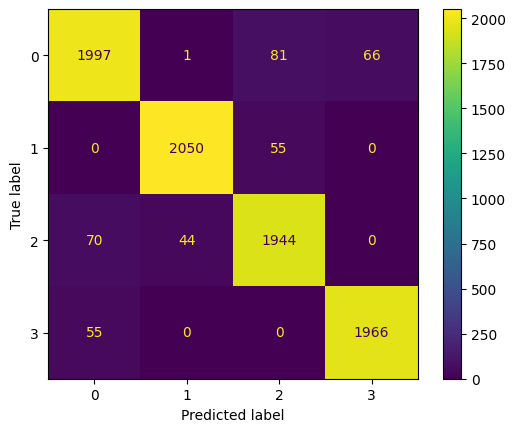

In [ ]:
# Create the confusion matrix

ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot();

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=50)

rf.fit(X1_train, y1_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y1_pred = rf.predict(X1_test)

In [ ]:
accuracy_rf = accuracy_score(y1_test, y1_pred )*100
print(f"Accuracy: {accuracy_rf:.2f} %")

Accuracy: 96.59 %


In [ ]:
classification_rep = classification_report(y1_test, y1_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
                    precision    recall  f1-score   support

     High Fatigue       0.95      0.95      0.95      2145
      Low Fatigue       0.99      0.98      0.98      2105
 Moderate Fatigue       0.95      0.96      0.95      2058
Very High Fatigue       0.98      0.98      0.98      2021

         accuracy                           0.97      8329
        macro avg       0.97      0.97      0.97      8329
     weighted avg       0.97      0.97      0.97      8329



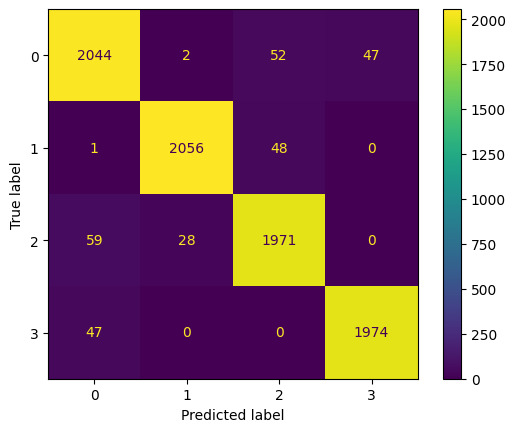

In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y1_test, y1_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot();

Downloading the RF Classifier model as a joblib for the webapp using streamlit

In [ ]:
from joblib import dump

dump(rf, 'random_forest.joblib')

['random_forest.joblib']

**Applying  k-Nearest Neighbors (k-NN) Classifier**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn.fit(X1_train, y1_train)

KNeighborsClassifier()

In [ ]:
y1_pred = knn.predict(X1_test)

In [ ]:
accuracy_knn = accuracy_score(y1_test, y1_pred )*100
print(f"Accuracy: {accuracy_knn:.2f} %")

Accuracy: 66.43 %


In [ ]:
classification_rep = classification_report(y1_test, y1_pred)
print("Classification Report: \n", classification_rep)

Classification Report: 
                    precision    recall  f1-score   support

     High Fatigue       0.54      0.63      0.58      2145
      Low Fatigue       0.81      0.74      0.78      2105
 Moderate Fatigue       0.51      0.58      0.54      2058
Very High Fatigue       0.92      0.70      0.79      2021

         accuracy                           0.66      8329
        macro avg       0.69      0.66      0.67      8329
     weighted avg       0.69      0.66      0.67      8329



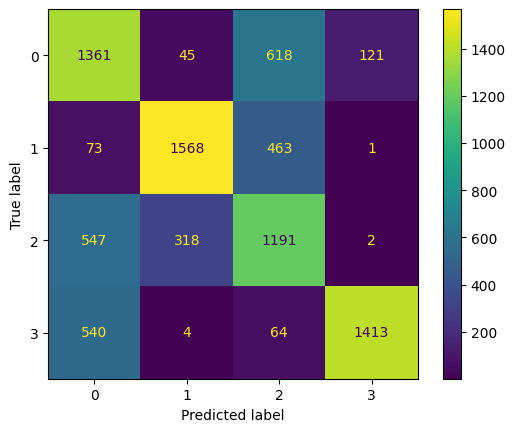

In [ ]:
conf_matrix = confusion_matrix(y1_test, y1_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

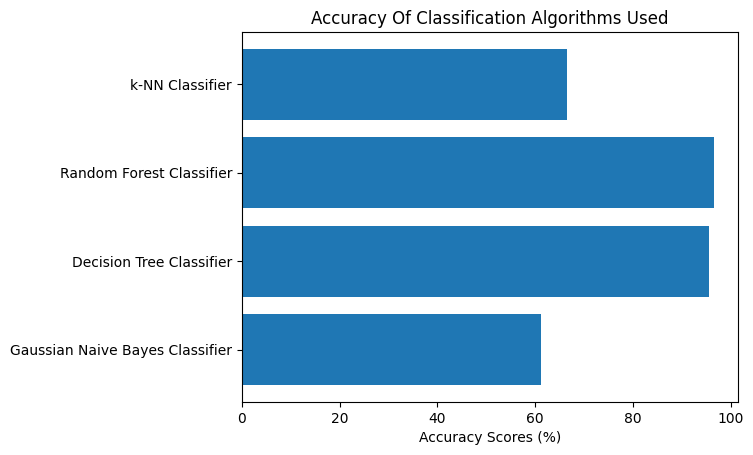

In [ ]:
algorithms = ['Gaussian Naive Bayes Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'k-NN Classifier']
model_scores = [accuracy_gnb, accuracy_dt , accuracy_rf , accuracy_knn ]

plt.barh(algorithms, model_scores)
plt.title('Accuracy Of Classification Algorithms Used')
plt.xlabel('Accuracy Scores (%)')
plt.show()

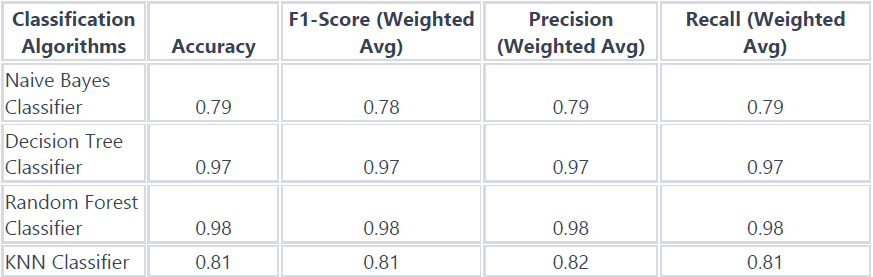